In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\machine learning\food-texture.csv")
data.head()

,Unnamed: 0,Oil,Density,Crispy,Fracture,Hardness
0,B110,16.5,2955,10,23,97
1,B136,17.7,2660,14,9,139
2,B171,16.2,2870,12,17,143
3,B192,16.7,2920,10,31,95
4,B225,16.3,2975,11,26,143


In [3]:
data.describe()

,Oil,Density,Crispy,Fracture,Hardness
count,50.000000,50.00000,50.000000,50.000000,50.000000
mean,17.202000,2857.60000,11.520000,20.860000,128.180000
std,1.592007,124.49998,1.775571,5.466073,31.127578
min,13.700000,2570.00000,7.000000,9.000000,63.000000
25%,16.300000,2772.50000,10.000000,17.000000,107.250000
50%,16.900000,2867.50000,12.000000,21.000000,126.000000
75%,18.100000,2945.00000,13.000000,25.000000,143.750000
max,21.200000,3125.00000,15.000000,33.000000,192.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Oil         50 non-null     float64
 2   Density     50 non-null     int64  
 3   Crispy      50 non-null     int64  
 4   Fracture    50 non-null     int64  
 5   Hardness    50 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB


In [5]:
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.head()

,Oil,Density,Crispy,Fracture,Hardness
0,16.5,2955,10,23,97
1,17.7,2660,14,9,139
2,16.2,2870,12,17,143
3,16.7,2920,10,31,95
4,16.3,2975,11,26,143


In [6]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [7]:
# Determine the number of factors using explained variance
fa = FactorAnalysis()  
fa.fit(scaled_data)

FactorAnalysis()

In [8]:
# Calculate eigenvalues (variance explained by factors)
eigenvalues = np.var(fa.transform(scaled_data), axis=0)

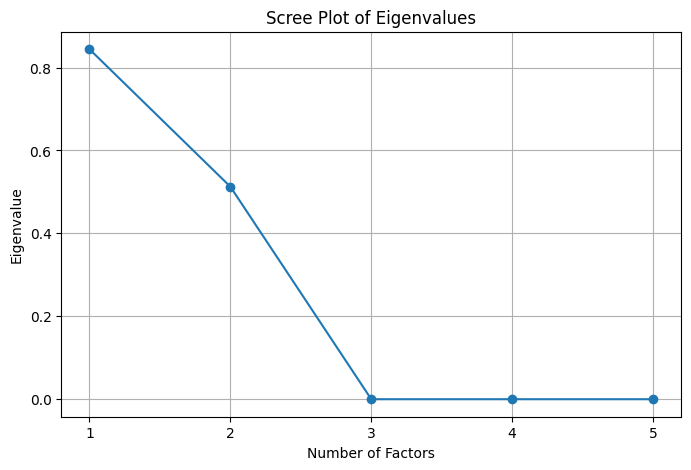

In [9]:
# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title("Scree Plot of Eigenvalues")
plt.xlabel("Number of Factors")
plt.ylabel("Eigenvalue")
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid()
plt.show()

The scree plot shows a steep drop in eigenvalues from Factor 1 to Factor 2, followed by a flattening after Factor 2. This indicates that the first two 
factors capture most of the variance in the data, while additional factors contribute very little.
Following the Elbow Rule, retaining 2 factors is optimal, as adding more would not provide significant new insights but could introduce unnecessary complexity.

In [10]:
# Choose number of factors using the elbow method
optimal_factors = 2  # Set based on scree plot elbow
print(f"Using {optimal_factors} factors based on the elbow method.")

Using 2 factors based on the elbow method.


In [11]:
# Apply Factor Analysis with selected number of factors
fa1 = FactorAnalysis(n_components=optimal_factors)
fa1.fit(scaled_data)

FactorAnalysis(n_components=2)

In [12]:
# Factor Loadings
factor_loadings = pd.DataFrame(fa1.components_.T, 
                               index=numeric_data.columns, 
                               columns=[f'Factor {i+1}' for i in range(optimal_factors)])
print("Factor Loadings:")
display(factor_loadings)

Factor Loadings:


,Factor 1,Factor 2
Oil,-0.688660,0.441448
Density,0.771513,-0.494242
Crispy,-0.957506,-0.142683
Fracture,0.855834,0.155682
Hardness,-0.319668,-0.717508


## INTERPRETATION
Factor 1 (Texture):"Density," and "Fracture" strongly load on this factor. This means these features are closely related and describe "Texture."
Factor 2 (Moisture): "Oil" and "Hardness" load on this factor. This suggests Factor 2 represents the moisture/oil content of the food.

In [13]:
# Calculate cumulative variance explained by factors
explained_variance = np.var(fa.transform(scaled_data), axis=0)
cumulative_variance = np.cumsum(explained_variance) / np.sum(explained_variance)
print("Cumulative variance explained:", cumulative_variance)

explained_variance_ratio = explained_variance / np.sum(explained_variance)
print("Variance explained by each factor:", explained_variance_ratio)


Cumulative variance explained: [0.62217777 1.         1.         1.         1.        ]
Variance explained by each factor: [0.62217777 0.37782223 0.         0.         0.        ]


## INTERPRETATION
The first factor explains 62.2% of the total variance, while the second factor accounts for the remaining 37.8%, bringing the cumulative variance to 100%. Since the cumulative variance reaches 1.0, the remaining factors do not contribute additional variance. Together, these two factors fully explain the variability in the data.